In [4]:
from openfermion.hamiltonians import MolecularData
from openfermion.transforms import get_fermion_operator, get_sparse_operator, jordan_wigner,bravyi_kitaev
from openfermion.utils import get_ground_state,eigenspectrum,count_qubits
import numpy as np
import scipy
import scipy.linalg
from openfermionpyscf import run_pyscf

In [2]:
data_directory = 'LiH/LiH_data'

# Set molecule parameters.
# basis = 'sto-3g'
basis = 'sto-6g'

multiplicity = 1

# bond_length_interval = 0.1
# n_points = 30
# bond_length_min = 1.0

bond_lengths = np.loadtxt("spacings.txt")

In [52]:
for point in range(0, bond_lengths.size):
#     bond_length = bond_length_min + bond_length_interval * point
#     bond_length = round(bond_length,3)
#     bond_lengths += [bond_length]
    bond_length = bond_lengths[point]
    description = str(round(bond_length,3))
    print('bond_length = ',description)
    
    geometry = [('Li', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    
    molecule = MolecularData(
        geometry, basis, multiplicity, description=description,data_directory=data_directory)
    
    molecule = run_pyscf(molecule, 
                     run_mp2 =True,
                     run_cisd = True,
                     run_ccsd = True,
                     run_fci = True)
    
    molecule.save()

bond_length =  1.0


/home/taoyin/miniconda3/envs/python_3/lib/python3.7/site-packages/pyscf/scf/chkfile.py:31: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(chkfile) as fh5:
/home/taoyin/miniconda3/envs/python_3/lib/python3.7/site-packages/pyscf/lib/misc.py:876: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5py.File.__init__(self, filename, *args, **kwargs)


bond_length =  1.061
bond_length =  1.122
bond_length =  1.184
bond_length =  1.245
bond_length =  1.306
bond_length =  1.367
bond_length =  1.429
bond_length =  1.49
bond_length =  1.551
bond_length =  1.612
bond_length =  1.673
bond_length =  1.735
bond_length =  1.796
bond_length =  1.857
bond_length =  1.918
bond_length =  1.98
bond_length =  2.041
bond_length =  2.102
bond_length =  2.163
bond_length =  2.224
bond_length =  2.286
bond_length =  2.347
bond_length =  2.408
bond_length =  2.469
bond_length =  2.531
bond_length =  2.592
bond_length =  2.653
bond_length =  2.714
bond_length =  2.776
bond_length =  2.837
bond_length =  2.898
bond_length =  2.959
bond_length =  3.02
bond_length =  3.082
bond_length =  3.143
bond_length =  3.204
bond_length =  3.265
bond_length =  3.327
bond_length =  3.388
bond_length =  3.449
bond_length =  3.51
bond_length =  3.571
bond_length =  3.633
bond_length =  3.694
bond_length =  3.755
bond_length =  3.816
bond_length =  3.878
bond_length =  3.

In [5]:
# Set Hamiltonian parameters.
active_space_start = 1
active_space_stop = 4


# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
gs_energies = []

for point in range(0, bond_lengths.size):
#     bond_length = bond_length_min + bond_length_interval * point
#     bond_length = round(bond_length,3)
#     bond_lengths += [bond_length]
    bond_length = bond_lengths[point]
    description = str(round(bond_length,3))
    
    geometry = [('Li', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    
    molecule = MolecularData(
        geometry, basis, multiplicity, description=description,data_directory=data_directory)
    
# Load data.
    molecule.load()
    
    # Get the Hamiltonian in an active space.
    molecular_hamiltonian = molecule.get_molecular_hamiltonian(
        occupied_indices=range(active_space_start),
        active_indices=range(active_space_start, active_space_stop))
    
    rdm = molecule.get_molecular_rdm(use_fci=True)

    # Map operator to fermions and qubits.
    fermion_hamiltonian = get_fermion_operator(molecular_hamiltonian)
    qubit_hamiltonian = bravyi_kitaev(fermion_hamiltonian)
    qubit_hamiltonian.compress()
    
    # Get sparse Hamiltonian and energy in rotated basis.
    sparse_hamiltonian = get_sparse_operator(qubit_hamiltonian)
    energy, state = get_ground_state(sparse_hamiltonian)

    
    if point == 0:
        print('The total required qubits is:{}'.format(count_qubits(qubit_hamiltonian)))
#         print('The Jordan-Wigner Hamiltonian in canonical basis follows:\n{}'.format(qubit_hamiltonian))


#     gs_energies += [eigenspectrum(qubit_hamiltonian)[0]]
    gs_energies += [energy]
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]

np.savetxt("gs_energies.txt",np.array(gs_energies))
np.savetxt("hf_energies.txt",np.array(hf_energies))
np.savetxt("fci_energies.txt",np.array(fci_energies))

The total required qubits is:6


In [6]:
molecular_hamiltonian;

fermion_hamiltonian;

qubit_hamiltonian

-7.347401922370468 [] +
0.03231340848650476 [X0 X1 X2] +
-0.011609328971486393 [X0 X1 X2 Z3] +
0.007192968303540583 [X0 X1 Z3 X4] +
0.04858559281376315 [X0 Y1 Y2] +
-0.01034286468175097 [X0 Y1 Y2 Z4] +
-0.01753583298529155 [X0 Y1 Y2 Z4 Z5] +
0.007192968303540583 [X0 Y1 Z2 Y4 Z5] +
0.03801808524202848 [X0 Z1 X2] +
0.03801808524202848 [X0 Z1 X2 Z3] +
0.006221170997084509 [X0 Z1 X4] +
0.006221170997084509 [X0 X4 Z5] +
0.03231340848650476 [Y0 X1 Y2] +
-0.011609328971486393 [Y0 X1 Y2 Z3] +
0.007192968303540583 [Y0 X1 Z3 Y4] +
-0.04858559281376315 [Y0 Y1 X2] +
0.01034286468175097 [Y0 Y1 X2 Z4] +
0.01753583298529155 [Y0 Y1 X2 Z4 Z5] +
-0.007192968303540583 [Y0 Y1 Z2 X4 Z5] +
0.03801808524202848 [Y0 Z1 Y2] +
0.03801808524202848 [Y0 Z1 Y2 Z3] +
0.006221170997084509 [Y0 Z1 Y4] +
0.006221170997084509 [Y0 Y4 Z5] +
-0.040702614582469994 [Z0] +
0.03231340848650476 [Z0 X1 Z2] +
-0.011609328971486393 [Z0 X1 Z2 Z3] +
-0.048585592813763144 [Z0 X1 Z3] +
0.01753583298529155 [Z0 X1 Z3 Z4] +
0.0103428646817

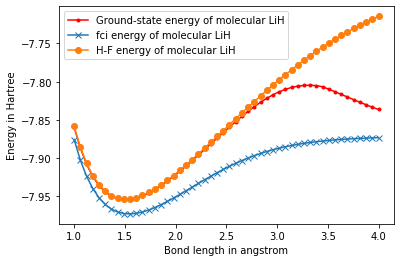

In [7]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(0)
plt.plot(bond_lengths, gs_energies, "r.-",
         label="Ground-state energy of molecular LiH")
plt.plot(bond_lengths, fci_energies, 'x-',
        label="fci energy of molecular LiH")
plt.plot(bond_lengths, hf_energies, 'o-',
        label="H-F energy of molecular LiH")

plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()

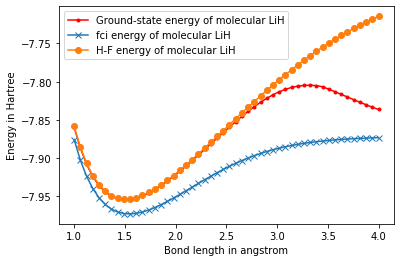

In [12]:
plt.figure(0)
plt.plot(bond_lengths, gs_energies, "r.-",
         label="Ground-state energy of molecular LiH")
plt.plot(bond_lengths, fci_energies, 'x-',
        label="fci energy of molecular LiH")
plt.plot(bond_lengths, hf_energies, 'o-',
        label="H-F energy of molecular LiH")

plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()

# Construct effective Hamiltonian on qubits 0,2,4, by average on |1> for qubit 1,3,5

In [8]:
qubit_hamiltonian.terms

{(): -7.347401922370468,
 ((0, 'Z'),): -0.040702614582469994,
 ((0, 'X'), (1, 'Y'), (2, 'Y')): 0.04858559281376315,
 ((0, 'Y'), (1, 'Y'), (2, 'X')): -0.04858559281376315,
 ((0, 'Z'), (1, 'Z')): -0.040702614582470015,
 ((0, 'Z'), (1, 'X'), (3, 'Z')): -0.048585592813763144,
 ((1, 'X'), (2, 'Z')): 0.048585592813763144,
 ((2, 'Z'),): -0.08807183170449988,
 ((1, 'Z'), (2, 'Z'), (3, 'Z')): -0.08807183170449988,
 ((4, 'Z'),): -0.16521435226706005,
 ((4, 'Z'), (5, 'Z')): -0.16521435226706005,
 ((1, 'Z'),): 0.09144241908506286,
 ((0, 'Y'), (1, 'X'), (2, 'Y')): 0.03231340848650476,
 ((0, 'X'), (1, 'X'), (2, 'X')): 0.03231340848650476,
 ((1, 'X'), (3, 'Z')): -0.03231340848650476,
 ((0, 'Z'), (1, 'X'), (2, 'Z')): 0.03231340848650476,
 ((0, 'Y'), (1, 'Z'), (2, 'Y'), (3, 'Z')): 0.03801808524202848,
 ((0, 'X'), (1, 'Z'), (2, 'X')): 0.03801808524202848,
 ((0, 'X'), (1, 'Z'), (2, 'X'), (3, 'Z')): 0.03801808524202848,
 ((0, 'Y'), (1, 'Z'), (2, 'Y')): 0.03801808524202848,
 ((0, 'Y'), (4, 'Y'), (5, 'Z')):

In [9]:
# the first qubit is 
def partial_average(key,drop_qubits=[1,3,5],avg_dict={'X':0,'Y':0,'Z':1},init_fock=0):
    key=list(key)
    factor=1
    new_key=[]
    for k in key:
        if k[0] not in drop_qubits:
            new_key.append(k)
        if k[0] in drop_qubits:
            if k[0]==0:
                factor*=avg_dict[k[1]]
            else:
                factor*=avg_dict[k[1]]
        #print(key)
    new_key=tuple(new_key)
    {new_key:factor}
    return (new_key,factor)

In [10]:
reduced_terms=[]
for key in terms_dict.keys():
    rt=partial_average(key)   
    reduced_terms.append(rt)
reduced_terms

NameError: name 'terms_dict' is not defined

## combining all same terms in sim_dict

In [11]:
import numpy as np
ham_terms=np.array([f[0] for f in reduced_terms])
factors=np.array([f[1] for f in reduced_terms])
cs=np.array([c for c in qubit_hamiltonian.terms.values()])
cs_rescale=np.multiply(factors,cs)

reduced_terms_rescale=[]
for i in range(len(reduced_terms)):
    if cs_rescale[i] !=0:
        reduced_terms_rescale.append((reduced_terms[i][0],cs_rescale[i]))
reduced_terms_rescale

ValueError: operands could not be broadcast together with shapes (0,) (62,) 

In [425]:
sim_dict={}
for term in reduced_terms_rescale:
    if term not in sim_dict.keys():
        sim_dict[term[0]]=term[1]
    else:
        sim_dict[term[0]]+=term[1]
[sim_dict.values()]

dict_values([0.0782811414931556, 0.027882756551390667, -0.1467285465541622, -0.16125794620832434, 0.0030560036156364436, 0.0030560036156364436, 0.005754199313654237, 0.005754199313654237, 0.05262597180170608, 0.06175754692930809, 0.010350244330067713, 0.010350244330067713, 0.060282913124720165])